# Lab | Data Aggregation and Filtering

Objective: Use Python programming techniques to filter and order data subsets, group data by one or more variables, and use aggregation functions to obtain insights, and derive meaningful conclusions from the data.

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing first data cleaning, formatting, and structuring.

Start by reading the dataset, standardizing column names, dealing with null values and creating the month column. You can do so by using the functions you developed in previous labs, or by reading the clean dataset you saved in the last lab `data structuring and combining`.

Then, answer the following questions:

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

2. Analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the median customer lifetime value by education level and gender.

5. Find the maximum, minimum, and average number of open complaints by state and policy type.

6. The marketing team wants to analyze the number of policies sold by state and month.

Present the data in a table where the months are arranged as columns and the states are arranged as rows.

7. Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states with the highest number of policies sold.

*Hint:* 
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

8. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [7]:
import pandas as pd

data = pd.read_csv("cleaned_marketing_data.csv")
display(data.head())

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
1,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
2,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
3,13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
4,16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2


In [13]:
new_df = data[(data['total_claim_amount'] > 1000) & (data['response'] == 'Yes')]

In [28]:
average_claim = data[data['response'] == 'Yes'].groupby(['policy_type', 'gender']).total_claim_amount.mean()

In [15]:
state_policy_counts = data['state'].value_counts()
state_policy_counts = state_policy_counts[state_policy_counts > 500]

In [16]:
median_clv = data.groupby(['education', 'gender']).customer_lifetime_value.median()

In [29]:
complaint_stats = data.groupby(['state', 'policy_type']).number_of_open_complaints.agg(['max', 'min', 'mean'])

In [33]:
df_policies_sold = data.groupby(['state', 'month'])['number_of_policies'].sum()

In [37]:
df= data.groupby(['state', 'month'])['number_of_policies'].sum().reset_index()
top_states = df.groupby('state')['number_of_policies'].sum().nlargest(3).index
df_top_states = df[df['state'].isin(top_states)]

In [42]:
df_melted = pd.melt(data, id_vars='sales_channel', value_vars='response')
df_response_rate = df_melted.groupby(['sales_channel', 'value']).size().unstack().fillna(0)
response_rate = df_response_rate['Yes'] / df_response_rate.sum(axis=1)

In [ ]:
#Lab | Customer Analysis Round 3

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

file = pd.read_csv("/Users/durimferati/Desktop/IRONHACK/Week_1/Day_4/Afternoon/lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv")
file.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [13]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
file.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


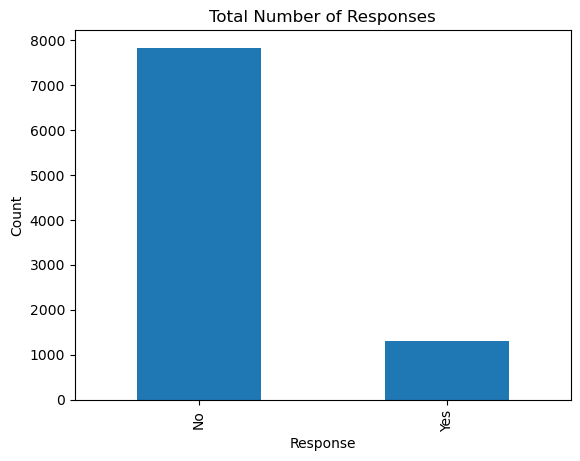

In [14]:
#Show a plot of the total number of responses
file['Response'].value_counts().plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Total Number of Responses')
plt.show()

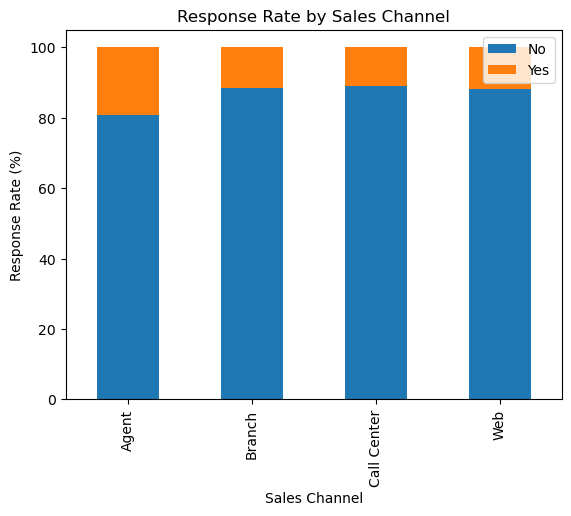

In [17]:
response_rate_by_channel = file.groupby('Sales Channel')['Response'].value_counts(normalize=True).mul(100).unstack()
response_rate_by_channel.plot(kind='bar', stacked=True)
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate (%)')
plt.title('Response Rate by Sales Channel')
plt.legend(loc='upper right')
plt.show()

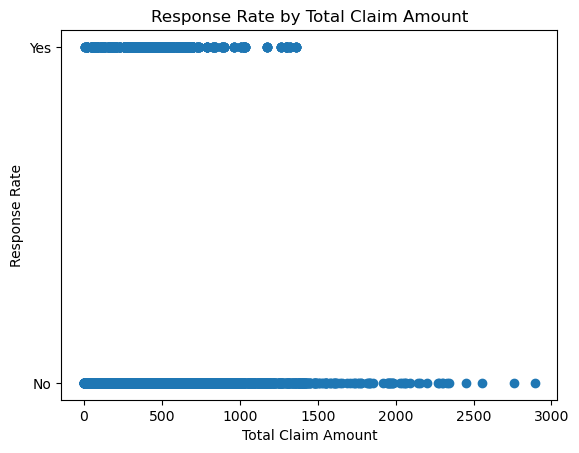

In [20]:
plt.scatter(file['Total Claim Amount'], file['Response'])
plt.xlabel('Total Claim Amount')
plt.ylabel('Response Rate')
plt.title('Response Rate by Total Claim Amount')
plt.show()

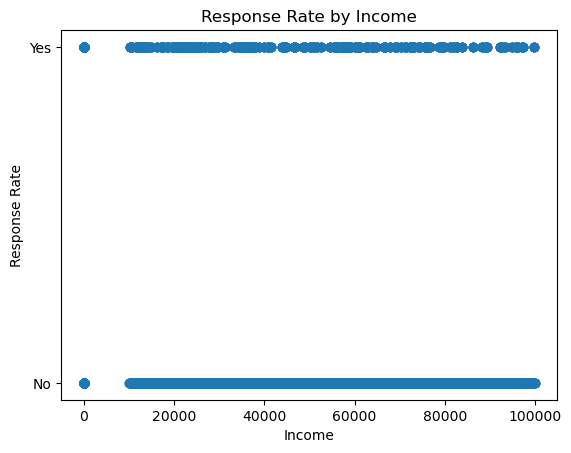

In [21]:
plt.scatter(file['Income'], file['Response'])
plt.xlabel('Income')
plt.ylabel('Response Rate')
plt.title('Response Rate by Income')
plt.show()